In [2596]:
import numpy as np

In [2597]:
import pandas as pd

In [2598]:
import matplotlib.pyplot as plt

In [2599]:
%matplotlib inline

In [2600]:
%config InlineBackend.figure_format = 'retina'

In [2601]:
from sklearn.metrics import r2_score

In [2602]:
from sklearn.model_selection import train_test_split

In [2603]:
from sklearn.ensemble import RandomForestRegressor as RF

### Загрузка и подготовка данных

Загрузка тренировочных данных

In [2604]:
data = pd.read_csv('train.csv')

Просмотр данных и информации

In [2605]:
data.shape

(10000, 20)

In [2606]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [2607]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [2608]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


#### Признаки LifeSquare и Healthcare_1

Признаки 'LifeSquare' и 'Healthcare_1' содержат отсутсвующие данные, предпологаю что данные параметры не будут влиять на предсказание цены.

Удаляю параметр 'LifeSquare'

In [2609]:
data = data.drop(['LifeSquare'], axis = 1)

Удаляю параметр 'Healthcare_1'

In [2610]:
data = data.drop(['Healthcare_1'], axis = 1)

#### Признак Rooms

Рассмотрим детальнее признак Rooms

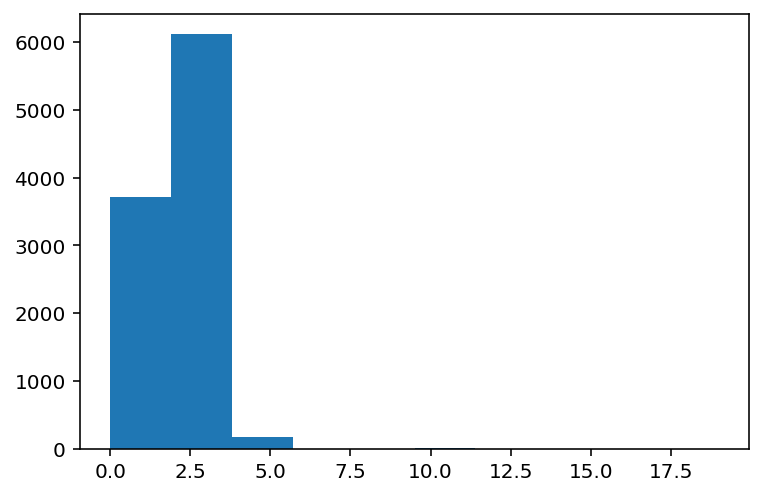

In [2611]:
plt.hist(data['Rooms'], bins=10);

In [2612]:
data.Rooms.value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Все квартиры больше 5 комнат и меньше 1 судя по подсчетам являються выбросами.

In [2613]:
data.loc[(data['Rooms'] > 5) | (data['Rooms'] < 1)]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1397,12638,27,0.0,138.427694,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1454,8491,1,19.0,42.006046,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
1981,7917,27,0.0,212.932361,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2170,14003,99,6.0,59.414334,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
2269,7317,27,0.0,41.790881,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646


Определим количестов комнат по площади квартиры таковых уже известных квартир и возьмем от них количестов комнат и применим к выбросам

In [2614]:
def ch_rooms(dataframe):
    group=dataframe.loc[(dataframe['Rooms'] < 5) & (dataframe['Rooms'] != 0)].\
    groupby(['Rooms'],as_index=False).agg({'Square':'mean'})
    for index, row in dataframe.loc[(dataframe['Rooms'] > 5) | (dataframe['Rooms'] == 0)].iterrows():
        array = []
        for i,r in group.iterrows():
            array.append(((row['Square'] - r['Square']) ** 2,r['Rooms']))
        dataframe.loc[index,'Rooms'] = sorted(array)[0][1]
    return (dataframe)

In [2615]:
data = ch_rooms(data)

Проверяем результат

In [2616]:
data.Rooms.value_counts()

2.0    3884
1.0    3709
3.0    2236
4.0     153
5.0      18
Name: Rooms, dtype: int64

Выбросы отсутсвуют

#### Признаки Square и KitchenSquare

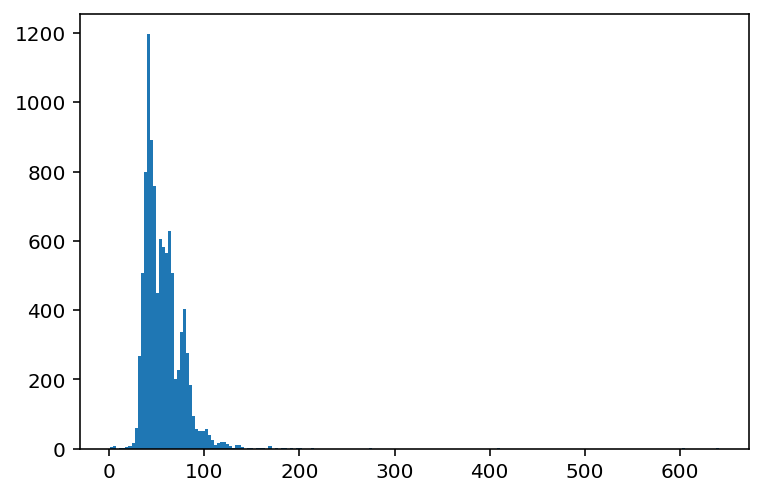

In [2617]:
plt.hist(data['Square'], bins=200);

Из гистограммы видим что имеються выбросы

Посмотрим на медианы

In [2618]:
data[['Square', 'KitchenSquare', 'Rooms']].groupby('Rooms').median().T

Rooms,1.0,2.0,3.0,4.0,5.0
Square,40.40659,55.850302,77.417692,98.686703,116.084861
KitchenSquare,6.00000,6.000000,7.000000,8.000000,9.000000


Возьмем за основу что квартиры бывают от 30 до 200 кв.м, все остальное это выбросы и их нужно исправить

In [2619]:
def ch_square(dataframe):
    group = dataframe.loc[(dataframe['Square'] < 200) & (dataframe['Square'] > 30)].\
    groupby(['Rooms'], as_index=False).agg({'Square':'mean'})
    for index, row in dataframe.loc[(dataframe['Square'] > 200) | (dataframe['Square'] < 1)].iterrows():
        array = []
        for i,r in group.iterrows():
            if row['Rooms']  == r['Rooms']:
                dataframe.loc[index,'Square']=r['Square']
    return (dataframe)

In [2620]:
data = ch_square(data)

In [2621]:
def ch_kitchen(dataframe):
    kitchen = dataframe[dataframe['KitchenSquare'] > dataframe['Square']].index
    dataframe.loc[kitchen, 'KitchenSquare'] = round(dataframe['KitchenSquare'].median())
    return (dataframe)

#### Признаки Floor и HouseFloor

Возьмем за основу что дома у нас не больше 50 этажей, все что больше считаем выбросом

In [2622]:
data.loc[data['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
6131,10806,5,1.0,51.944587,1.0,6,99.0,1977,0.150818,B,B,16,3433,4,4,5,B,296127.115515
8599,9300,74,2.0,71.747869,9.0,5,99.0,1977,0.075779,B,B,6,1437,3,0,2,B,243329.912579
8854,78,30,2.0,65.773749,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,3,23,B,207248.370520


Меняем этажность домов

In [2623]:
data.loc[data['HouseFloor'] == 99, 'HouseFloor'] = 9

In [2624]:
data.loc[data['HouseFloor'] == 117, 'HouseFloor'] = 17

Приводим в порядок номер этажа и этажность дома, если номер этажа больше чем этажность дома тогда меняем их местами

In [2625]:
floors = data[data['HouseFloor'] < data['Floor']].index
data.loc[floors, 'Floor'], data.loc[floors, 'HouseFloor'] = data.loc[floors, 'HouseFloor'], data.loc[floors, 'Floor']

#### Признак HouseYear

Есть несколько выбросов в параметре дата постройки 'HouseYear'

In [2626]:
np.sort(data.HouseYear.unique())

array([    1910,     1912,     1914,     1916,     1917,     1918,
           1919,     1928,     1929,     1930,     1931,     1932,
           1933,     1934,     1935,     1936,     1937,     1938,
           1939,     1940,     1941,     1942,     1947,     1948,
           1950,     1951,     1952,     1953,     1954,     1955,
           1956,     1957,     1958,     1959,     1960,     1961,
           1962,     1963,     1964,     1965,     1966,     1967,
           1968,     1969,     1970,     1971,     1972,     1973,
           1974,     1975,     1976,     1977,     1978,     1979,
           1980,     1981,     1982,     1983,     1984,     1985,
           1986,     1987,     1988,     1989,     1990,     1991,
           1992,     1993,     1994,     1995,     1996,     1997,
           1998,     1999,     2000,     2001,     2002,     2003,
           2004,     2005,     2006,     2007,     2008,     2009,
           2010,     2011,     2012,     2013,     2014,     2

Имеем 3 выброса: 1) 20052011, 2) 2020, 3) 4968. Вместо значения 20052011 берем среднее между 2005 и 2011 это 2008. Значение 2020 оставим и посмотрим на результат. Значение 4968 это ошибочно написанный 1968 год.

In [2627]:
data.loc[data['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,9.0,9.0,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,5.0,4.0,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [2628]:
data.loc[data['HouseYear']==20052011,'HouseYear']=2008
data.loc[data['HouseYear']==4968,'HouseYear']=1968

Проверяем результат

In [2629]:
np.sort(data.HouseYear.unique())

array([1910, 1912, 1914, 1916, 1917, 1918, 1919, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1947, 1948, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])

Выбросы отсутсвуют

#### Категориальные признаки Ecology_2, Ecology_3 и Shops_2, целочисленные

In [2630]:
def ch_category(dataframe, cat_feats=['Ecology_2', 'Ecology_3', 'Shops_2']):
    df_copy = dataframe.copy()
    for col in cat_feats:
        df_copy.loc[:, col] = dataframe[col].map({'A': 1, 'B': 0})
    return df_copy

In [2631]:
data = ch_category(data)

Разбираемся с целочисленными признаками

In [2632]:
def ch_int(dataframe, cat_feats=['Rooms', 'KitchenSquare', 'Floor', 'HouseFloor']):
    df_copy = dataframe.copy()
    for col in cat_feats:
        df_copy.loc[:, col] = dataframe[col].astype(int)
    return df_copy

In [2633]:
data = ch_int(data)

In [2634]:
data = data.astype("float32")

### Готовим датасеты

In [2635]:
train, valid = train_test_split(data, test_size=0.20, random_state=42)

In [2636]:
train.shape, valid.shape

((8000, 18), (2000, 18))

In [2637]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 9254 to 7270
Data columns (total 18 columns):
Id               8000 non-null float32
DistrictId       8000 non-null float32
Rooms            8000 non-null float32
Square           8000 non-null float32
KitchenSquare    8000 non-null float32
Floor            8000 non-null float32
HouseFloor       8000 non-null float32
HouseYear        8000 non-null float32
Ecology_1        8000 non-null float32
Ecology_2        8000 non-null float32
Ecology_3        8000 non-null float32
Social_1         8000 non-null float32
Social_2         8000 non-null float32
Social_3         8000 non-null float32
Helthcare_2      8000 non-null float32
Shops_1          8000 non-null float32
Shops_2          8000 non-null float32
Price            8000 non-null float32
dtypes: float32(18)
memory usage: 625.0 KB


In [2638]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6252 to 6929
Data columns (total 18 columns):
Id               2000 non-null float32
DistrictId       2000 non-null float32
Rooms            2000 non-null float32
Square           2000 non-null float32
KitchenSquare    2000 non-null float32
Floor            2000 non-null float32
HouseFloor       2000 non-null float32
HouseYear        2000 non-null float32
Ecology_1        2000 non-null float32
Ecology_2        2000 non-null float32
Ecology_3        2000 non-null float32
Social_1         2000 non-null float32
Social_2         2000 non-null float32
Social_3         2000 non-null float32
Helthcare_2      2000 non-null float32
Shops_1          2000 non-null float32
Shops_2          2000 non-null float32
Price            2000 non-null float32
dtypes: float32(18)
memory usage: 156.2 KB


### Подготовка модели

In [2639]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Price'],
      dtype='object')

In [2640]:
feats = ['DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 
         'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3', 
         'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2']

In [2641]:
model = RF(n_estimators=999,
           max_features=7,
           max_depth=50,
           random_state=42)

In [2642]:
model.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=50,
                      max_features=7, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=999,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [2643]:
pred_train = model.predict(train.loc[:, feats])

In [2644]:
pred_valid = model.predict(valid.loc[:, feats])

### Оценка результата

In [2645]:
r2_score(train['Price'], pred_train)

0.9656903934931605

In [2646]:
r2_score(valid['Price'], pred_valid)

0.7337020878576959

## Готовим тестовый сет

In [2647]:
test = pd.read_csv('test.csv')

In [2648]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [2649]:
test = test.drop(['LifeSquare'], axis = 1)

In [2650]:
test = test.drop(['Healthcare_1'], axis = 1)

In [2651]:
test.Rooms.value_counts()

2.0     2030
1.0     1769
3.0     1099
4.0       90
5.0        7
0.0        2
6.0        2
17.0       1
Name: Rooms, dtype: int64

In [2652]:
test = ch_rooms(test)

In [2653]:
test.Rooms.value_counts()

2.0    2031
1.0    1769
3.0    1100
4.0      93
5.0       7
Name: Rooms, dtype: int64

In [2654]:
test[['Square', 'KitchenSquare', 'Rooms']].groupby('Rooms').median().T

Rooms,1.0,2.0,3.0,4.0,5.0
Square,40.117689,55.826428,77.675828,95.784106,120.330727
KitchenSquare,6.000000,6.000000,7.000000,8.000000,8.000000


In [2655]:
test = ch_square(test)

In [2656]:
test = ch_kitchen(test)

In [2657]:
test.loc[test['HouseFloor'] > 50]

,Id,DistrictId,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
651,15864,27,3.0,47.722835,9.0,18,99.0,1977,0.072158,B,B,2,629,1,0,0,A


In [2658]:
test.loc[test['HouseFloor'] == 99, 'HouseFloor'] = 9

In [2659]:
floors = test[test['HouseFloor'] < test['Floor']].index
test.loc[floors, 'Floor'], test.loc[floors, 'HouseFloor'] = test.loc[floors, 'HouseFloor'], test.loc[floors, 'Floor']

In [2660]:
np.sort(test.HouseYear.unique())

array([1908, 1909, 1910, 1911, 1912, 1914, 1917, 1918, 1920, 1926, 1927,
       1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1937, 1938, 1939,
       1940, 1941, 1943, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [2661]:
test = ch_category(test)

In [2662]:
test = ch_int(test)

In [2663]:
test = test.astype("float32")

In [2664]:
test['Price'] = model.predict(test.loc[:, feats])

In [2665]:
test.loc[:, ['Id', 'Price']].to_csv('MFionov_predictions.csv', index=None)

In [2666]:
result = pd.read_csv('MFionov_predictions.csv')

In [2667]:
result.shape

(5000, 2)

In [2668]:
result

,Id,Price
0,725.0,161197.626494
1,15856.0,227191.339926
2,5480.0,213739.553827
3,15664.0,346542.155061
4,14275.0,146168.170287
5,7633.0,206492.654436
6,13329.0,170340.415822
7,5502.0,227310.327730
8,4220.0,298673.307925
9,11538.0,210083.986393
